In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json
from pprint import pprint
import numpy as np
import time
import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
genre_pop_100_df = pd.read_csv("Resources/100 popular with genre.csv", index_col=0)
genre_pop_100_df.head()


,genre,movie id,overview,title,year
0,Science Fiction,169,Ten years after a band of mercenaries first ba...,Predator 2,1990
1,Action,169,Ten years after a band of mercenaries first ba...,Predator 2,1990
2,Thriller,169,Ten years after a band of mercenaries first ba...,Predator 2,1990
3,Fantasy,162,A small suburban town receives a visit from a ...,Edward Scissorhands,1990
4,Drama,162,A small suburban town receives a visit from a ...,Edward Scissorhands,1990


In [4]:
movie_list=[]
year=[]
sentiment_compound=[]
genre=[]
for index, row in genre_pop_100_df.iterrows():
    sentiment_results = analyzer.polarity_scores(row["overview"])
    sentiment_comp = sentiment_results["compound"]
    sentiment_compound.append(sentiment_comp)
    movie_list.append(row["movie id"])
    year.append(row["year"]) 



In [6]:
df_sentiment_analytics = pd.DataFrame({"movie id": movie_list,
                        "sentiment comp": sentiment_compound,
                        "Year": year})
df_sentiment_analytics.head()

,movie id,sentiment comp,Year,Genre
0,169,-0.9169,1990,Science Fiction
1,169,-0.9169,1990,Action
2,169,-0.9169,1990,Thriller
3,162,0.0000,1990,Fantasy
4,162,0.0000,1990,Drama


In [17]:
group_by_yeargenre = df_sentiment_analytics.groupby(["Year","Genre"])
df_grouped = pd.DataFrame(group_by_yeargenre["sentiment comp"].mean())
df_grouped.reset_index(inplace=True)
df_grouped.head()

,Year,Genre,sentiment comp
0,1990,Action,-0.400428
1,1990,Adventure,-0.228500
2,1990,Animation,-0.128067
3,1990,Comedy,-0.061513
4,1990,Crime,-0.334495


In [ ]:
#x_min = datetime.datetime.strptime((df_sentimet_analytics["release date"].min()),"%Y-%m-%d") - datetime.timedelta(days=5)
#x_max = datetime.datetime.strptime((df_sentimet_analytics["release date"].max()),"%Y-%m-%d") + datetime.timedelta(days=5)
#x_max

In [41]:
df_pivot = pd.pivot_table(df_grouped,values=["sentiment comp"], columns="Gender", index="Year")
df_pivot.head()
#

sentiment comp                                                      \
Genre         Action Adventure Animation    Comedy     Crime Documentary   
Year                                                                       
1990       -0.400428 -0.228500 -0.128067 -0.061513 -0.334495         NaN   
1991       -0.168532  0.028012  0.041411 -0.006262 -0.171005     -0.9287   
1992       -0.311675 -0.058379  0.123975 -0.127654 -0.317510         NaN   
1993       -0.332400 -0.009811 -0.314282  0.018266 -0.425155         NaN   
1994       -0.279716 -0.180889  0.010630  0.241741 -0.143979         NaN   

                                                                            \
Genre     Drama    Family   Fantasy  History    Horror     Music   Mystery   
Year                                                                         
1990  -0.075667 -0.202310 -0.277750 -0.23740 -0.348094  0.411800 -0.736667   
1991   0.049124  0.352614 -0.078308  0.17455 -0.533633  0.047350 -0.410517   
1992  -0.087659 -0.309850 -0.103108 -0.00785 -0.415927 -0.117200 -0.398383   
1993  -0.136356 -0.029705 -0.233058 -0.13014 -0.797843  0.082733 -0.576056   
1994   0.067262  0.130745 -0.067824  0.36605 -0.397400  0.778300 -0.503189   

                                                                       
Genre   Romance Science Fiction TV Movie  Thriller       War  Western  
Year                                                                   
1990  -0.110194       -0.303836  -0.9687 -0.371143 -0.531900  0.69740  
1991   0.130775       -0.115600  -0.1531 -0.288145 -0.365900  0.06360  
1992   0.289516       -0.003200      NaN -0.271123 -0.466100 -0.09665  
1993  -0.040814       -0.165060      NaN -0.382312  0.291375 -0.85190  
1994   0.172781       -0.462122      NaN -0.371186  0.142000  0.69010

TypeError: hlines() missing 1 required positional argument: 'xmax'

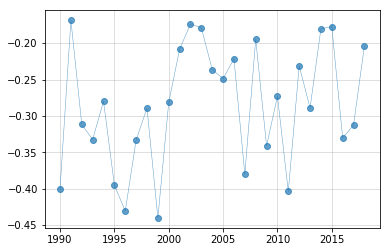

In [82]:
#drama comedy romance horror
fig1, ax1=plt.subplots()
ax1.plot(df_pivot.index, df_pivot["sentiment comp"]["Action"],alpha=0.7, marker="o", linewidth=0.5)

ax1.plot(df_pivot.index, df_pivot["sentiment comp"]["Action"],alpha=0.7, marker="o", linewidth=0.5)
plt.grid(True, alpha=0.5)
plt.hlines(1,1990,)
plt.title("How people feel towards the 5 most Genre Women dominating")
plt.xlabel("Release Year")
plt.ylabel("Sentiment Compound")
plt.ylim(-1,.75)
plt.legend(loc="best", bbox_to_anchor=(1,1))
plt.figsize=(50,20)